## **Module: Quantitative Methods**
## **Title: Electricity in London: How income and population density affect domestic electricity consumption**
## **Student: Eleni Kalantzi**

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sms
import seaborn as sns

### Reading the data - exploring summary statistics

In [34]:
dataset = pd.read_excel('electricity.xlsx')
dataset.head(5)

,Borough Code,Borough,av_dom_electr_cons_kwh,median_annual_income,pop_density
0,E09000001,City of London,7966.132216,60000,2645.032566
1,E09000002,Barking and Dagenham,3249.624909,23900,5892.712927
2,E09000003,Barnet,4093.216722,28700,4577.022673
3,E09000004,Bexley,3694.027151,26900,4126.712502
4,E09000005,Brent,3601.714573,24700,7791.775459


In [35]:
dataset.describe()

,av_dom_electr_cons_kwh,median_annual_income,pop_density
count,33.000000,33.000000,33.000000
mean,3719.008717,30593.939394,7594.127567
std,855.268939,6746.431436,4080.046251
min,2892.148337,23900.000000,2216.226991
25%,3306.756972,27100.000000,4577.022673
50%,3663.502341,28200.000000,6048.988138
75%,3807.621690,32400.000000,11166.988826
max,7966.132216,60000.000000,16037.727467


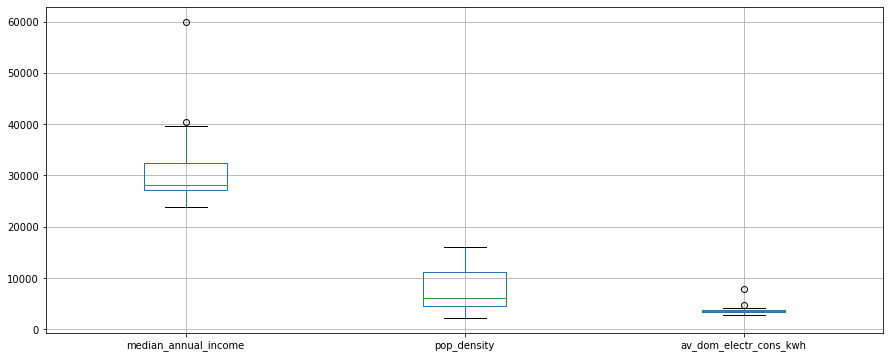

In [92]:
boxplot = dataset.boxplot(column=['median_annual_income', 'pop_density', 'av_dom_electr_cons_kwh'], figsize = (15,6))
plt.savefig('box')

### Performing the regression

In [40]:
x_values = dataset.iloc[:, 3:].values
y_values = dataset.iloc[:, 2].values
print(x_values,y_values)

[[60000.          2645.03256617]
 [23900.          5892.71292695]
 [28700.          4577.02267274]
 [26900.          4126.71250175]
 [24700.          7791.7754589 ]
 [32000.          2216.22699139]
 [37300.         11594.54677171]
 [27500.          4523.46308915]
 [26700.          6315.39092982]
 [26300.          4177.76525578]
 [27600.          6048.98813782]
 [29400.         14790.25829406]
 [33200.         11224.3041648 ]
 [27100.          9604.84772363]
 [27600.          5060.54526088]
 [27900.          2292.04953756]
 [27100.          2678.67721991]
 [26400.          4970.96068892]
 [33400.         16037.72746707]
 [40400.         13139.29636994]
 [32400.          4819.52045743]
 [29900.         12485.02659545]
 [27300.          8828.74062847]
 [30200.          5566.04540343]
 [24100.          9758.58318561]
 [28000.          5422.10986133]
 [36100.          3473.78798517]
 [29400.         11166.98882577]
 [28200.          4729.58446101]
 [30200.         16035.51762788]
 [25500.  

In [41]:
# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()

# and print a summary of the results:
print(regression_model_b.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     74.36
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.37e-12
Time:                        16:09:37   Log-Likelihood:                -239.67
No. Observations:                  33   AIC:                             485.3
Df Residuals:                      30   BIC:                             489.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1164.3818    312.902      3.721      0.0

In [113]:
predictor_coeffs  = regression_model_b.params[1:]
constant          = regression_model_b.params[0] # called the 'intercept' in simple regression
Rsquared          = regression_model_b.rsquared
MSE               = regression_model_b.mse_resid
pvalues_T         = regression_model_b.pvalues[1:]
pvalue_F          = regression_model_b.f_pvalue

In [104]:
# Print these summary stats:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)

predictor coefficients = [ 0.10589123 -0.09020168]
constant               = 1164.3818089711062
Rsquared               = 0.8321457235865114
MSE                    = 130968.40368865516
T-test pvalues         = [3.50254186e-12 2.90293373e-06]
F-test pvalue          = 2.365844265573224e-12


### Plotting the histograms

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


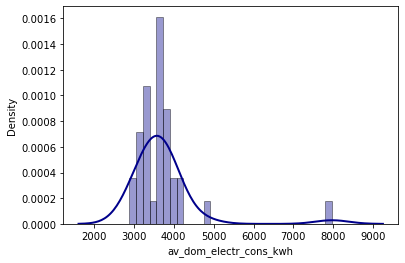

In [93]:
# Density Plot and Histogram of mortality
sns.distplot(dataset['av_dom_electr_cons_kwh'], hist=True, kde=True,
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.savefig('distr_electr')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


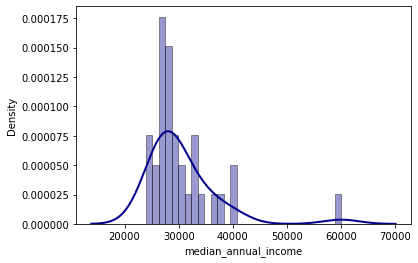

In [94]:
# Density Plot and Histogram of median annual income
sns.distplot(dataset['median_annual_income'], hist=True, kde=True,
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.savefig('distr_inc')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


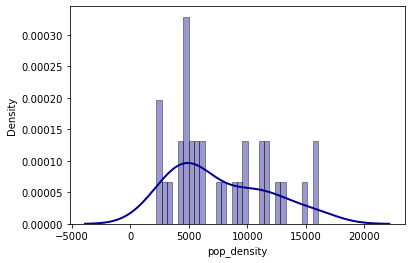

In [95]:
# Density Plot and Histogram of people without qualifications
sns.distplot(dataset['pop_density'], hist=True, kde=True,
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.savefig('distr_density')

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


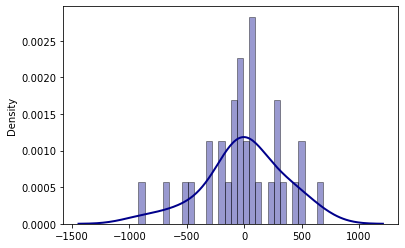

In [96]:
# Density Plot and Histogram of people without qualifications
sns.distplot(regression_model_b.resid, hist=True, kde=True,
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.savefig('distr_resid')

### Visualing plots (Line fit plot, Residuals' plot, Q-Q plot)

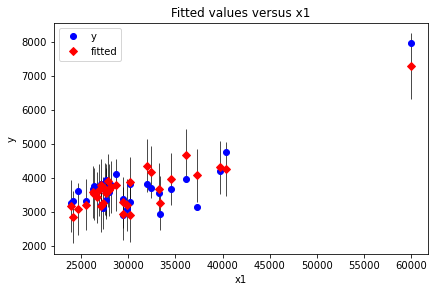

In [98]:
from statsmodels.graphics.gofplots import qqplot_2samples
fig = sms.graphics.plot_fit(regression_model_b, "x1")
fig.tight_layout(pad=0.5)
fig.savefig('regressionlinex1')

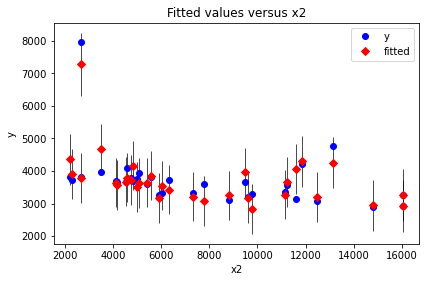

In [99]:
fig = sms.graphics.plot_fit(regression_model_b, "x2")
fig.tight_layout(pad=1.0, w_pad=0.5, h_pad=1.0)
fig.savefig('regressionlinex2')

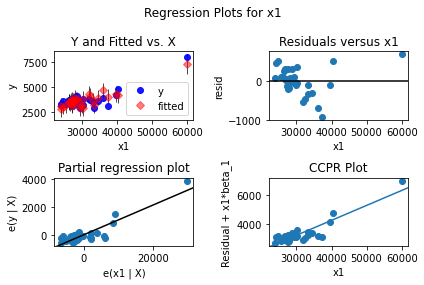

In [51]:
fig = sms.graphics.plot_regress_exog(regression_model_b, "x1")
fig.tight_layout()
fig.savefig('regressionplot')

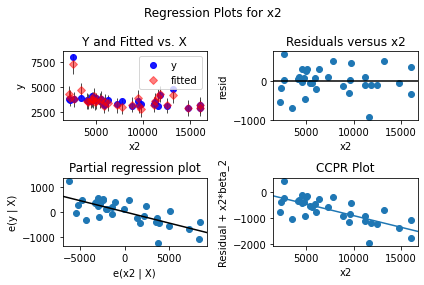

In [52]:
fig = sms.graphics.plot_regress_exog(regression_model_b, "x2")
fig.tight_layout()
fig.savefig('regressionplot2')

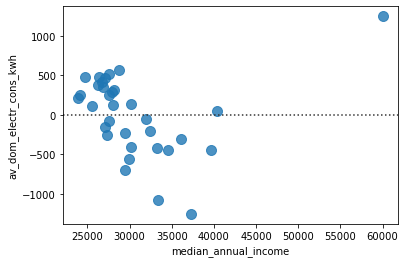

In [106]:
sns.residplot(x="median_annual_income", y="av_dom_electr_cons_kwh", data=dataset, scatter_kws={"s": 100})


<AxesSubplot:xlabel='pop_density', ylabel='av_dom_electr_cons_kwh'>

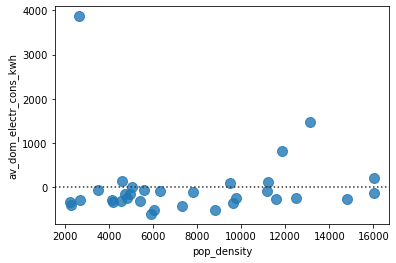

In [112]:
sns.residplot(x="pop_density", y="av_dom_electr_cons_kwh", data=dataset, scatter_kws={"s": 100})

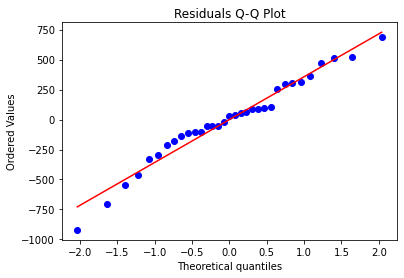

In [110]:
import scipy.stats as stats
#Running qq plot 
stats.probplot(regression_model_b.resid, dist="norm", plot= plt)
plt.title("Residuals Q-Q Plot")
#Saving plot as a png
plt.savefig("Model_Resid_qqplot.png")

### Calculating VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set 
X = dataset[['median_annual_income', 'pop_density']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["ind_var"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(X.shape[1])] 
  
print(vif_data)

                ind_var      VIF
0  median_annual_income  4.13681
1           pop_density  4.13681


### Checking corelation

                      median_annual_income  pop_density
median_annual_income               1.00000      0.07054
pop_density                        0.07054      1.00000


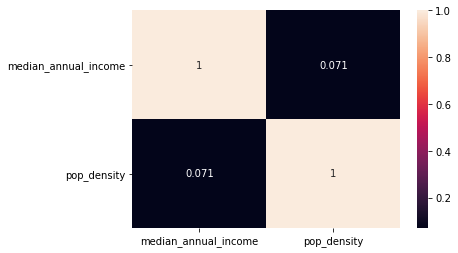

<Figure size 432x288 with 0 Axes>

In [97]:
corrMatrix = X.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()
plt.savefig('heatmap')